In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import IFrame
import seaborn as sns
from sklearn.model_selection import train_test_split

# read data

In [2]:
data = pd.read_csv("insurance.csv")

In [3]:
data.shape

(1338, 7)

In [4]:
#Turn data to binary value
data['sex'] = data['sex'].map({'male':0,'female':1})
data['smoker'] = data['smoker'].map({'yes':1,'no':0})
data['region'] = data['region'].map({'southwest':1,'southeast':2 ,'northwest':3 ,'northeast':4})

In [5]:
print("******************converted data to numbers**********************")

data.head(10)

******************converted data to numbers**********************


,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520
5,31,1,25.740,0,0,2,3756.62160
6,46,1,33.440,1,0,2,8240.58960
7,37,1,27.740,3,0,3,7281.50560
8,37,0,29.830,2,0,4,6406.41070
9,60,1,25.840,0,0,3,28923.13692


In [6]:
print('***********************data.describe************************* ')
print(data.describe())

***********************data.describe************************* 
               age          sex          bmi     children       smoker  \
count  1338.000000  1338.000000  1338.000000  1338.000000  1338.000000   
mean     39.207025     0.494768    30.663397     1.094918     0.204783   
std      14.049960     0.500160     6.098187     1.205493     0.403694   
min      18.000000     0.000000    15.960000     0.000000     0.000000   
25%      27.000000     0.000000    26.296250     0.000000     0.000000   
50%      39.000000     0.000000    30.400000     1.000000     0.000000   
75%      51.000000     1.000000    34.693750     2.000000     0.000000   
max      64.000000     1.000000    53.130000     5.000000     1.000000   

            region       charges  
count  1338.000000   1338.000000  
mean      2.484305  13270.422265  
std       1.104885  12110.011237  
min       1.000000   1121.873900  
25%       2.000000   4740.287150  
50%       2.000000   9382.033000  
75%       3.000000  16639

In [7]:
data.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.020856,0.109272,0.042469,-0.025019,-0.002127,0.299008
sex,0.020856,1.000000,-0.046371,-0.017163,-0.076185,0.004588,-0.057292
bmi,0.109272,-0.046371,1.000000,0.012759,0.003750,-0.157566,0.198341
children,0.042469,-0.017163,0.012759,1.000000,0.007673,-0.016569,0.067998
smoker,-0.025019,-0.076185,0.003750,0.007673,1.000000,0.002181,0.787251
region,-0.002127,0.004588,-0.157566,-0.016569,0.002181,1.000000,0.006208
charges,0.299008,-0.057292,0.198341,0.067998,0.787251,0.006208,1.000000


# correlation matrix

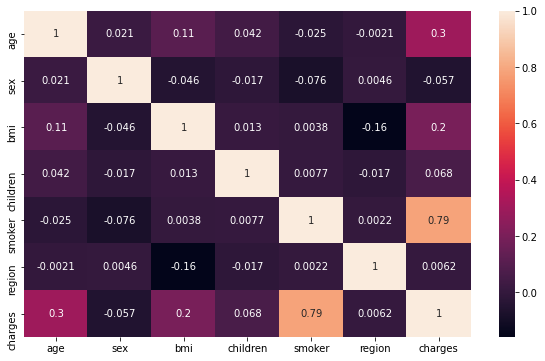

In [8]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True)
plt.show()

# drop sex

In [9]:
data.drop('sex' , axis=1 , inplace=True)

# rescaling data

In [10]:
# rescaling data
data = (data - data.mean()) / data.std()

In [11]:
print('*********************data after normalization**************** ')
print(data.head(10) )

*********************data after normalization**************** 
        age       bmi  children    smoker    region   charges
0 -1.438227 -0.453151 -0.908274  1.969850 -1.343402  0.298472
1 -1.509401  0.509431 -0.078738 -0.507273 -0.438331 -0.953333
2 -0.797655  0.383164  1.580335 -0.507273 -0.438331 -0.728402
3 -0.441782 -1.305043 -0.908274 -0.507273  0.466741  0.719574
4 -0.512957 -0.292447 -0.908274 -0.507273  0.466741 -0.776512
5 -0.584132 -0.807354 -0.908274 -0.507273 -0.438331 -0.785615
6  0.483487  0.455316 -0.078738 -0.507273 -0.438331 -0.415345
7 -0.157084 -0.479388  1.580335 -0.507273  0.466741 -0.494543
8 -0.157084 -0.136663  0.750799 -0.507273  1.371813 -0.566805
9  1.479931 -0.790956 -0.908274 -0.507273  0.466741  1.292543


In [12]:
print('***********************data.describe after nomaliz************************* ')
print(data.describe())

***********************data.describe after nomaliz************************* 
                age           bmi      children        smoker        region  \
count  1.338000e+03  1.338000e+03  1.338000e+03  1.338000e+03  1.338000e+03   
mean  -1.810543e-16  1.553275e-15 -2.540735e-16 -1.908455e-17 -2.398015e-17   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -1.509401e+00 -2.411110e+00 -9.082741e-01 -5.072734e-01 -1.343402e+00   
25%   -8.688299e-01 -7.161386e-01 -9.082741e-01 -5.072734e-01 -4.383307e-01   
50%   -1.473495e-02 -4.319265e-02 -7.873775e-02 -5.072734e-01 -4.383307e-01   
75%    8.393600e-01  6.609101e-01  7.507986e-01 -5.072734e-01  4.667410e-01   
max    1.764630e+00  3.684145e+00  3.239407e+00  1.969850e+00  1.371813e+00   

            charges  
count  1.338000e+03  
mean  -9.459299e-17  
std    1.000000e+00  
min   -1.003182e+00  
25%   -7.043871e-01  
50%   -3.210888e-01  
75%    2.782401e-01  
max    4.170104e+00  


# separate X (training data) from y (target variable)

In [13]:
# separate X (training data) from y (target variable)
cols = data.shape[1]
X = data.iloc[:,0:cols-1 ]
Y = data.iloc[:,cols-1:cols]

In [14]:
X.head(10)

,age,bmi,children,smoker,region
0,-1.438227,-0.453151,-0.908274,1.969850,-1.343402
1,-1.509401,0.509431,-0.078738,-0.507273,-0.438331
2,-0.797655,0.383164,1.580335,-0.507273,-0.438331
3,-0.441782,-1.305043,-0.908274,-0.507273,0.466741
4,-0.512957,-0.292447,-0.908274,-0.507273,0.466741
5,-0.584132,-0.807354,-0.908274,-0.507273,-0.438331
6,0.483487,0.455316,-0.078738,-0.507273,-0.438331
7,-0.157084,-0.479388,1.580335,-0.507273,0.466741
8,-0.157084,-0.136663,0.750799,-0.507273,1.371813
9,1.479931,-0.790956,-0.908274,-0.507273,0.466741


In [15]:
Y.head(10)

,charges
0,0.298472
1,-0.953333
2,-0.728402
3,0.719574
4,-0.776512
5,-0.785615
6,-0.415345
7,-0.494543
8,-0.566805
9,1.292543


# split the full  into training & test sets

In [16]:
# split the full  into training & test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.67, random_state=42)

# split the training data  into training:validation sets

In [17]:
# split the training data  into training:validation sets
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, train_size=0.8, random_state=42)

In [18]:
X_train.head(10)

,age,bmi,children,smoker,region
1208,-0.157084,-0.837691,-0.078738,1.969850,1.371813
272,0.127614,1.047295,0.750799,-0.507273,0.466741
463,1.195233,-0.775377,-0.908274,-0.507273,1.371813
791,-1.438227,-0.502346,-0.908274,-0.507273,-1.343402
1169,-0.157084,0.564365,-0.078738,-0.507273,0.466741
786,1.479931,1.031717,-0.908274,-0.507273,1.371813
505,-0.157084,0.034699,1.580335,-0.507273,0.466741
828,0.127614,0.019121,1.580335,1.969850,1.371813
66,1.551106,1.383461,0.750799,-0.507273,-1.343402
747,-1.438227,-1.460827,-0.908274,-0.507273,0.466741


# LinearRegression fit

In [19]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)


LinearRegression()

# new_waights and intercept

In [20]:
intercept = model.intercept_
print('intercept:',intercept)
new_waights = model.coef_
print('slope:', new_waights)

intercept: [0.00512594]
slope: [[0.30593872 0.18166305 0.02972244 0.78779196 0.0412937 ]]


# y_predict

In [21]:
y_predict = model.predict(X_test)

# Actual charges vs Predicted charges

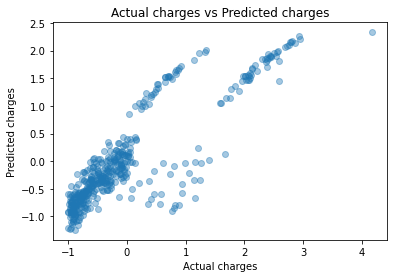

In [22]:
plt.scatter(Y_test,y_predict,alpha=0.4)
plt.xlabel("Actual charges")
plt.ylabel("Predicted charges")
plt.title("Actual charges vs Predicted charges")
plt.show()


# Train score

In [23]:
print('Train score: ')
score_train = model.score(X_train,Y_train)
print(score_train*100,'%')

Train score: 
74.93450856429682 %


# val score

In [24]:
print('val score: ')
score_val = model.score(X_val,Y_val)
print(score_val*100,'%')

val score: 
72.2372045944951 %


# test score

In [25]:
print('test score: ')
score_test = model.score(X_test,Y_test)
print(score_test*100,'%')


test score: 
75.97783207714238 %


# Residual Analysis

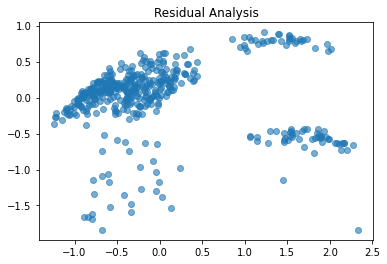

In [26]:
residuals = y_predict - Y_test

plt.scatter(y_predict, residuals, alpha=0.6)
plt.title('Residual Analysis')

plt.show()

In [27]:
# convert to matrices and initialize theta
X_train_matrix = np.matrix(X_train.values)
Y_train_matrix = np.matrix(Y_train.values)

X_test_matrix = np.matrix(X_test.values)
Y_test_matrix = np.matrix(Y_test.values)


waights = np.matrix(np.array([0,0,0,0,0]))

In [28]:
def computeCost(X_train_matrix, Y_train_matrix, waights):
    innervalue = np.power(((X_train_matrix * waights.T) - Y_train_matrix), 2)
    return np.sum(innervalue) / (2 * len(X_train_matrix))

# old cost_train

In [29]:
print("***********************cost************************")
computeCost(X_train_matrix, Y_train_matrix, waights) #we want to decrees this cost(error)

***********************cost************************


0.515116398636536

# final_updated_cost_train

In [30]:
print("***********************final_updated_cost************************")
final_updated_cost=computeCost(X_train_matrix, Y_train_matrix, new_waights)
final_updated_cost

***********************final_updated_cost************************


0.12900657470983742

In [31]:
my_pre=(X_test_matrix * new_waights.T)
print(my_pre)

[[-3.58018381e-01]
 [-4.96348341e-01]
 [ 1.97142067e+00]
 [-3.31981123e-01]
 [ 1.14153407e+00]
 [-2.06299030e-01]
 [-1.09009591e+00]
 [ 3.48244959e-01]
 [-1.01239771e+00]
 [-1.78925331e-01]
 [ 1.15626130e+00]
 [-3.21181247e-01]
 [-6.74301238e-01]
 [ 2.07676081e+00]
 [ 2.26504487e+00]
 [ 1.97229721e+00]
 [ 1.75802726e-01]
 [ 1.87882720e+00]
 [-3.50001345e-01]
 [ 1.51414443e+00]
 [-8.69655168e-01]
 [-2.92501387e-01]
 [-9.29951786e-01]
 [-4.72333366e-01]
 [-1.74130391e-01]
 [ 1.22170377e-02]
 [ 1.02837143e-01]
 [-6.07036274e-01]
 [-2.72017965e-01]
 [-9.22098403e-01]
 [-4.06820837e-01]
 [ 1.46982763e-02]
 [-7.15868028e-01]
 [-8.53013278e-01]
 [-7.64786406e-01]
 [ 2.84929930e-02]
 [-9.80904558e-01]
 [-3.97589370e-01]
 [ 1.65270523e+00]
 [ 1.59670231e+00]
 [-8.60294015e-01]
 [-7.36923051e-01]
 [ 6.12455243e-02]
 [-1.31362934e-01]
 [-3.79040719e-01]
 [-1.20683662e-01]
 [-6.66121794e-01]
 [-9.07050975e-01]
 [ 1.82137746e+00]
 [-3.43946075e-01]
 [ 2.41283699e-01]
 [-9.20380618e-01]
 [-4.4989885

In [32]:
print( y_predict)

[[-0.35289244]
 [-0.4912224 ]
 [ 1.97654662]
 [-0.32685518]
 [ 1.14666001]
 [-0.20117309]
 [-1.08496997]
 [ 0.3533709 ]
 [-1.00727177]
 [-0.17379939]
 [ 1.16138725]
 [-0.3160553 ]
 [-0.66917529]
 [ 2.08188675]
 [ 2.27017081]
 [ 1.97742315]
 [ 0.18092867]
 [ 1.88395315]
 [-0.3448754 ]
 [ 1.51927038]
 [-0.86452922]
 [-0.28737544]
 [-0.92482584]
 [-0.46720742]
 [-0.16900445]
 [ 0.01734298]
 [ 0.10796309]
 [-0.60191033]
 [-0.26689202]
 [-0.91697246]
 [-0.40169489]
 [ 0.01982422]
 [-0.71074208]
 [-0.84788733]
 [-0.75966046]
 [ 0.03361894]
 [-0.97577861]
 [-0.39246343]
 [ 1.65783117]
 [ 1.60182825]
 [-0.85516807]
 [-0.73179711]
 [ 0.06637147]
 [-0.12623699]
 [-0.37391477]
 [-0.11555772]
 [-0.66099585]
 [-0.90192503]
 [ 1.8265034 ]
 [-0.33882013]
 [ 0.24640964]
 [-0.91525467]
 [-0.03986394]
 [-0.96183051]
 [ 0.03827752]
 [-0.03742569]
 [-0.72033994]
 [ 1.55550875]
 [ 0.0048336 ]
 [ 0.01254804]
 [ 0.07498231]
 [-0.21968999]
 [ 0.23349535]
 [-0.46125141]
 [-0.07997751]
 [-0.76245788]
 [ 1.02879

In [33]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test , my_pre)

0.240011233021479

# cost_test

In [36]:
print("***********************cost_test************************")
computeCost(X_test_matrix, Y_test_matrix, waights) #we want to decrees this cost(error)

***********************cost_test************************


0.4998000214065829

# final_updated_cost_test

In [37]:
print("***********************final_updated_cost_test************************")
final_updated_cost_test=computeCost(X_test_matrix, Y_test_matrix, new_waights)
final_updated_cost_test

***********************final_updated_cost_test************************


0.1200056165107395